# Test Analysis / Plotting - Notebook 01 - p_depolym_GDP
Author: Bettina Vignolo

This notebook was created to perform several smaller experiments with the microtubule model and analyze the results.

In [1]:
# load Packages:
using Agents
using Statistics
using DataFrames
using Distributions
using StatsBase
using DrWatson: @dict
using Serialization
using InteractiveDynamics
using GLMakie
import ColorSchemes as co
using DataFramesMeta

# load Functions:
include("01_Agent.jl")
include("02_Initialization.jl")
include("03_AgentStep.jl")
include("04_ModelStep.jl")
include("05_Analysis.jl")

mean_velocity_cat (generic function with 1 method)

for parallelisation: (this will not be used due to computing power problems)

In [10]:
using Distributed
#addprocs(4)

@everywhere begin
    # load Packages:
    using Agents
    using Statistics
    using DataFrames
    using Distributions
    using StatsBase
    using DrWatson: @dict
    using Serialization
    using InteractiveDynamics
    using GLMakie
    import ColorSchemes as co
    using DataFramesMeta

    # load Functions:
    include("01_Agent.jl")
    include("02_Initialization.jl")
    include("03_AgentStep.jl")
    include("04_ModelStep.jl")
    include("05_Analysis.jl")
end    

## 1. First Experiment: MT Length with fixed parameters


### 1.1 first attempts to visualize results


In [7]:
#experiment run in "Ideas and Test Notebook" for 1800 steps with the following parameters:

model=initialize(; Nstarts = 5,
        periodic = true,
        numagents = 1000,
        griddims = (100,100), 
        p_polym = 1.0,
        p_hyd = 0.02,
        p_GTP_exchange = 0.01,
        p_depolym_GTP = 0.0,
        p_depolym_GDP = 0.5)

AgentBasedModel with 1000 agents of type tubulin
 space: GridSpace with size (100, 100), metric=chebyshev, periodic=true
 scheduler: randomly
 properties: tick, griddims, P_hyd, p_depolym_GDP, Nstarts, P_depolym_GTP, p_GTP_exchange, P_depolym_GDP, P_GTP_exchange, p_polym, p_hyd, p_depolym_GTP, numagents, P_polym

In [14]:
data1 = deserialize("data/MT size_0.01GTP_0.5depolym_0.02hyd_1000numag_1800 steps.jls")

,step,mean_MT_size,MT_size_1,MT_size_2,MT_size_3,MT_size_4,MT_size_5
,Int64,Float64,Int64,Int64,Int64,Int64,Int64
1,0,1.0,1,1,1,1,1
2,1,1.0,1,1,1,1,1
3,2,1.0,1,1,1,1,1
4,3,1.0,1,1,1,1,1
5,4,1.0,1,1,1,1,1
6,5,1.0,1,1,1,1,1
7,6,1.0,1,1,1,1,1
8,7,1.0,1,1,1,1,1
9,8,1.2,2,1,1,1,1


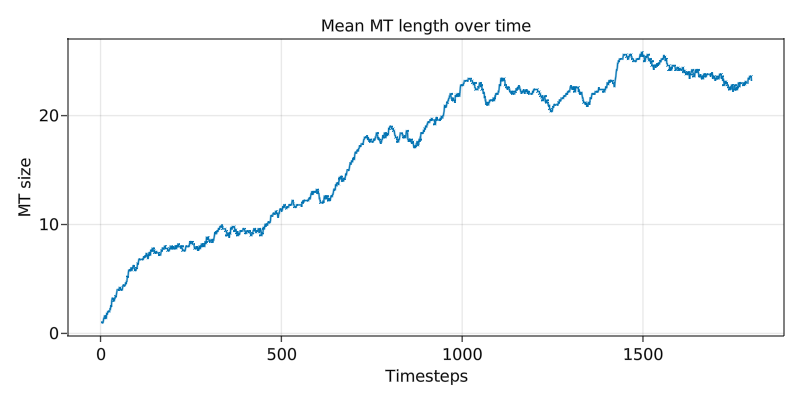

In [15]:
f1 = Figure(resolution =(800, 400))

ax1 = Axis(f1[1,1]; xlabel = "Timesteps", ylabel = "MT size", title = "Mean MT length over time")

liney = lines!(ax1, data1.step, data1.mean_MT_size)

f1

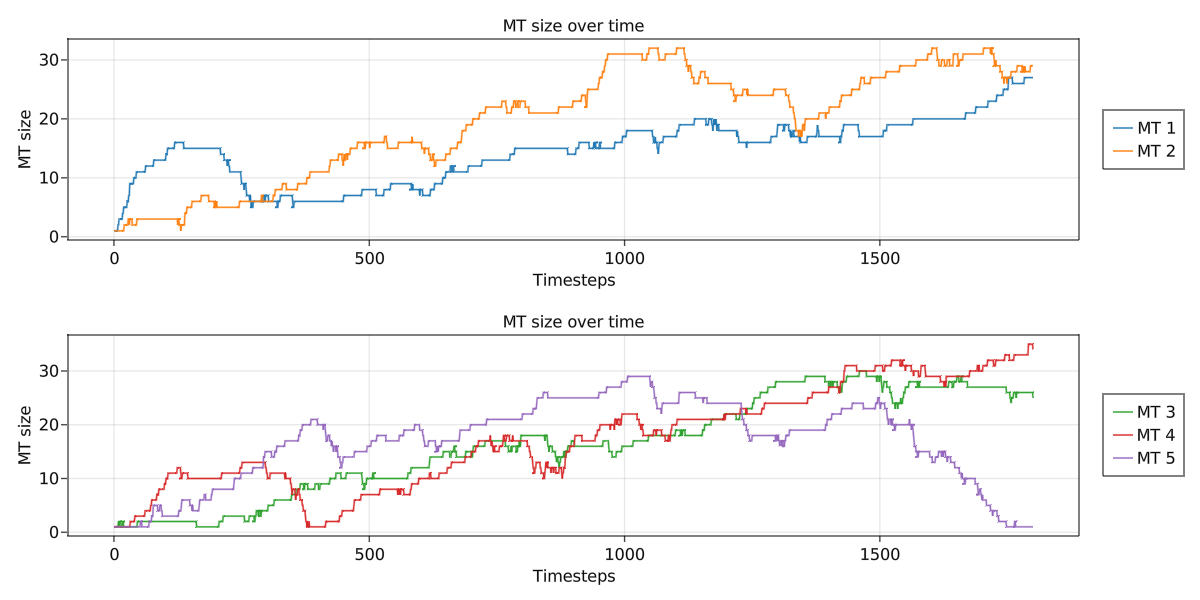

In [16]:
f1_2 = Figure(resolution =(1200, 600))
ax1_1 = Axis(f1_2[1,1]; xlabel = "Timesteps", ylabel = "MT size", title = "MT size over time")
ax1_2 = Axis(f1_2[2,1]; xlabel = "Timesteps", ylabel = "MT size", title = "MT size over time")

liney_1 = lines!(ax1_1, data1.step, data1.MT_size_1, label = "MT 1", color = co.tab10[1])
liney_2 = lines!(ax1_1, data1.step, data1.MT_size_2, label = "MT 2", color = co.tab10[2])
liney_3 = lines!(ax1_2, data1.step, data1.MT_size_3, label = "MT 3", color = co.tab10[3])
liney_4 = lines!(ax1_2, data1.step, data1.MT_size_4, label = "MT 4", color = co.tab10[4])
liney_5 = lines!(ax1_2, data1.step, data1.MT_size_5, label = "MT 5", color = co.tab10[5])

legend1 = Legend(f1_2[1,2], [liney_1, liney_2], ["MT 1", "MT 2"])
legend2 = Legend(f1_2[2,2], [liney_3, liney_4, liney_5], ["MT 3", "MT 4", "MT 5"])

f1_2

### 1.2 find out if parameters are coupled or not
Method: divide all parameters in half and give the model double the time to run and see if it yields the same result

In [18]:
data1 = deserialize("data/MT size_0.01GTP_0.5depolym_0.02hyd_1000numag_1800 steps.jls")[2];

LoadError: ArgumentError: syntax df[column] is not supported use df[!, column] instead

In [19]:
data1_1 = deserialize("data/MT size_0.005GTP_0.025depolym_0.01hyd_500numag_3600 steps.jls")[2];

In [20]:
data1_1

,step,mean_MT_size,MT_size_1,MT_size_2,MT_size_3,MT_size_4,MT_size_5
,Int64,Float64,Int64,Int64,Int64,Int64,Int64
1,0,1.0,1,1,1,1,1
2,1,1.0,1,1,1,1,1
3,2,1.0,1,1,1,1,1
4,3,1.0,1,1,1,1,1
5,4,1.4,2,1,1,1,2
6,5,1.4,2,1,1,1,2
7,6,1.4,2,1,1,1,2
8,7,1.4,2,1,1,1,2
9,8,1.4,2,1,1,1,2


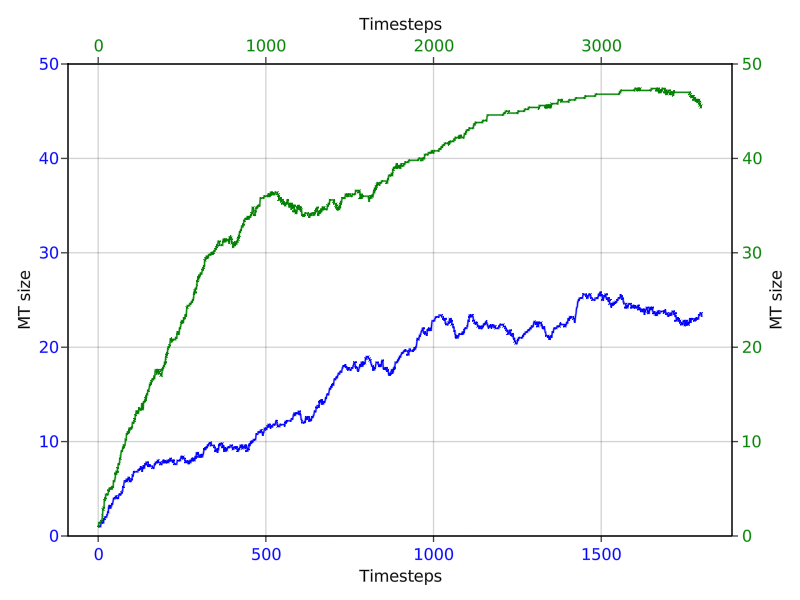

In [21]:
f1_2 = Figure(resolution =(800, 600))

ax1_2 = Axis(f1_2[1,1]; xlabel = "Timesteps", ylabel = "MT size", xticklabelcolor = :blue, yticklabelcolor = :blue)
ax1_3 = Axis(f1_2[1,1]; xaxisposition = :top, yaxisposition = :right, xlabel = "Timesteps", ylabel = "MT size", xticklabelcolor = :green, yticklabelcolor = :green)
#hidespines!(ax1_3)
#hidexdecorations!(ax1_3)
ylims!(ax1_2, 0, 50)
ylims!(ax1_3, 0, 50)

liney = lines!(ax1_2, data1.step, data1.mean_MT_size, color = :blue)
liney = lines!(ax1_3, data1_1.step, data1_1.mean_MT_size, color = :green)

f1_2
#mit mehr Ensembles wiederholen

repeat but with several ensembles

In [23]:
models = [initialize(;
        Nstarts = 2,
        periodic = true,
        numagents = 500,
        griddims = (50,50), 
        p_polym = 0.5,
        p_hyd = 0.01,
        p_GTP_exchange = 0.005,
        p_depolym_GTP = 0.0,
        p_depolym_GDP = 0.25)  
    for x in 1:30]

# Run ensemble of models for 3600 timesteps and collect data:
mdata = [mean_MT_size, MT_size_each]
mlabels = ["mean MT length", "MT_size_each"]

data_ens = ensemblerun!(models, agent_step!, model_step!, 3600; mdata);

In [24]:
serialize("data/MT size_0.005GTP_0.025depolym_0.01hyd_500numag_3600 steps_ensemble.jls", data_ens[2])

In [25]:
data_1 = deserialize("data/MT size_0.005GTP_0.025depolym_0.01hyd_500numag_3600 steps_ensemble.jls");

In [26]:
gdf = groupby(data_1, [:step])
# get some summary Statistics by group
summary_df_1 = combine(gdf, [:mean_MT_size] .=> [mean]);

In [28]:
#double parameters and half steps:
models = [initialize(;
        Nstarts = 4,
        periodic = true,
        numagents = 1000,
        griddims = (100,100), 
        p_polym = 1.0,
        p_hyd = 0.02,
        p_GTP_exchange = 0.01,
        p_depolym_GTP = 0.0,
        p_depolym_GDP = 0.5)  
    for x in 1:30]

# Run ensemble of models for 3600 timesteps and collect data:
mdata = [mean_MT_size, MT_size_each]
mlabels = ["mean MT length", "MT_size_each"]

data_ens = ensemblerun!(models, agent_step!, model_step!, 1800; mdata);

In [29]:
serialize("data/MT size_0.01GTP_0.05depolym_0.02hyd_1000numag_1800 steps_ensemble.jls", data_ens[2])

In [30]:
data_2 = deserialize("data/MT size_0.01GTP_0.05depolym_0.02hyd_1000numag_1800 steps_ensemble.jls");

In [31]:
gdf = groupby(data_2, [:step])
summary_df_2 = combine(gdf, [:mean_MT_size] .=> [mean]);

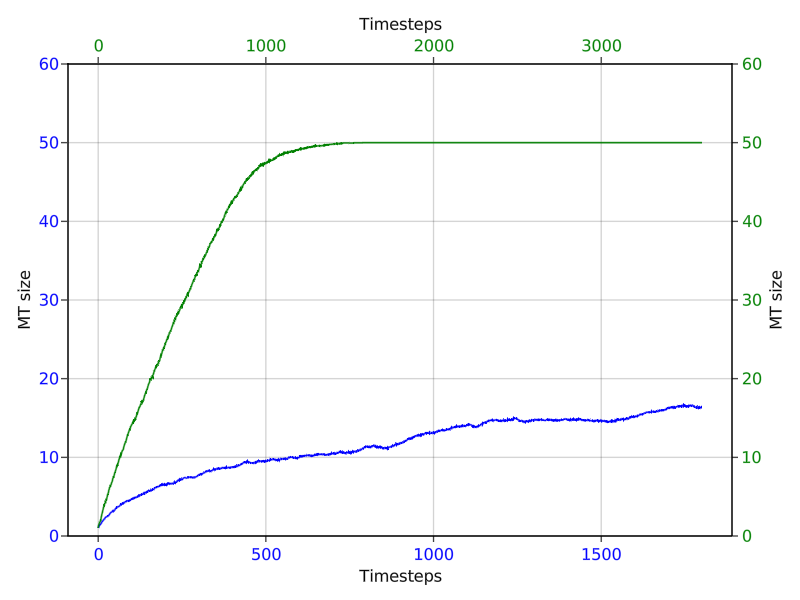

In [32]:
f1_3 = Figure(resolution =(800, 600))

ax1_4 = Axis(f1_3[1,1]; xlabel = "Timesteps", ylabel = "MT size", xticklabelcolor = :blue, yticklabelcolor = :blue)
ax1_5 = Axis(f1_3[1,1]; xaxisposition = :top, yaxisposition = :right, xlabel = "Timesteps", ylabel = "MT size", xticklabelcolor = :green, yticklabelcolor = :green)

ylims!(ax1_4, 0, 60)
ylims!(ax1_5, 0, 60)

liney = lines!(ax1_4, summary_df_2.step, summary_df_2.mean_MT_size_mean, color = :blue)
liney = lines!(ax1_5, summary_df_1.step, summary_df_1.mean_MT_size_mean, color = :green)

f1_3

repeat but Nstarts and dims stays the same

In [34]:
#half parameters, double steps
models = [initialize(;
        Nstarts = 4,
        periodic = true,
        numagents = 1000,
        griddims = (100,100), 
        p_polym = 0.5,
        p_hyd = 0.01,
        p_GTP_exchange = 0.005,
        p_depolym_GTP = 0.0,
        p_depolym_GDP = 0.25)  
    for x in 1:30]

mdata = [mean_MT_size]
mlabels = ["mean MT length"]

data_ens = ensemblerun!(models, agent_step!, model_step!, 10000; mdata)
serialize("data/MT size_0.005GTP_0.025depolym_0.01hyd_500numag_10000steps_30ensemble_2.jls", data_ens[2])

In [35]:
data_1 = deserialize("data/MT size_0.005GTP_0.025depolym_0.01hyd_500numag_10000steps_30ensemble_2.jls")
gdf = groupby(data_1, [:step])
# get some summary Statistics by group
summary_df_1 = combine(gdf, [:mean_MT_size] .=> [mean]);

In [38]:
#double parameters and half steps:
models = [initialize(;
        Nstarts = 4,
        periodic = true,
        numagents = 1000,
        griddims = (100,100), 
        p_polym = 1.0,
        p_hyd = 0.02,
        p_GTP_exchange = 0.01,
        p_depolym_GTP = 0.0,
        p_depolym_GDP = 0.5)  
    for x in 1:30]

mdata = [mean_MT_size]
mlabels = ["mean MT length"]

data_ens = ensemblerun!(models, agent_step!, model_step!, 5000; mdata)
serialize("data/MT size_0.01GTP_0.05depolym_0.02hyd_1000numag_5000steps_30ensemble.jls", data_ens[2])

In [39]:
data_2 = deserialize("data/MT size_0.01GTP_0.05depolym_0.02hyd_1000numag_5000steps_30ensemble.jls")
gdf = groupby(data_2, [:step])
summary_df_2 = combine(gdf, [:mean_MT_size] .=> [mean]);

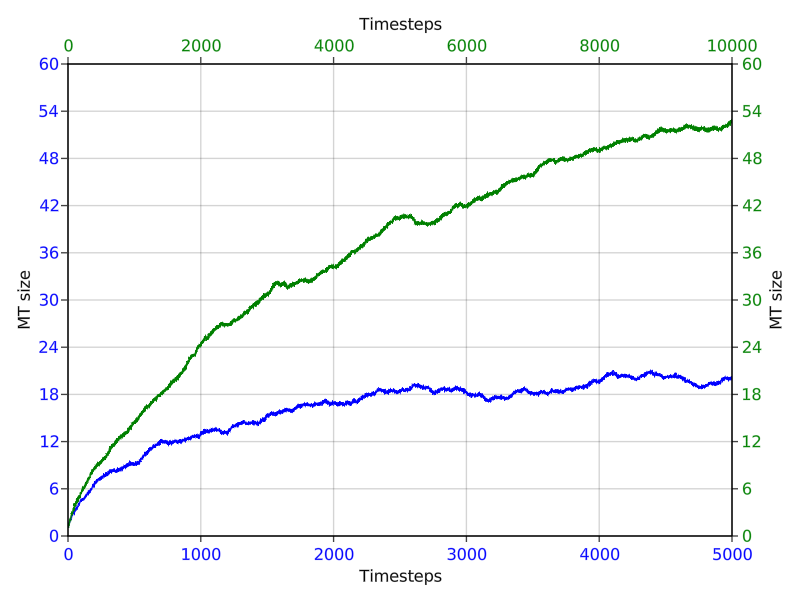

In [40]:
f1_4 = Figure(resolution =(800, 600))

ax1_6 = Axis(f1_4[1,1]; xlabel = "Timesteps", ylabel = "MT size", xticklabelcolor = :blue, yticklabelcolor = :blue, xticks = LinearTicks(5), yticks = LinearTicks(10))
ax1_7 = Axis(f1_4[1,1]; xaxisposition = :top, yaxisposition = :right, xlabel = "Timesteps", ylabel = "MT size", xticklabelcolor = :green, yticklabelcolor = :green , xticks = LinearTicks(5), yticks = LinearTicks(10))

ylims!(ax1_6, 0, 60)
ylims!(ax1_7, 0, 60)
xlims!(ax1_6, 0, 5000)
xlims!(ax1_7, 0, 10000)

liney = lines!(ax1_6, summary_df_2.step, summary_df_2.mean_MT_size_mean, color = :blue)
liney = lines!(ax1_7, summary_df_1.step, summary_df_1.mean_MT_size_mean, color = :green)
f1_4

## 2. Parameter Scan over p_depolym_GDP


### 2.1 first attempts to parameter scan over p_depolym_GDP


In [42]:
#run in "Ideas and Test Notebook" for n=10000 steps with the following parameters:
parameters=Dict(
        :griddims => (100,100),
        :periodic => true,
        :Nstarts => 3,
        :numagents => 1000, 
        :p_hyd => 0.02,                   
        :p_polym=> 1 ,    
        :p_depolym_GTP => 0,
        :p_depolym_GDP => collect([0:0.05:1]...),
        :p_GTP_exchange => 0.01)


Dict{Symbol, Any} with 9 entries:
  :p_GTP_exchange => 0.01
  :griddims       => (100, 100)
  :periodic       => true
  :p_depolym_GDP  => [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45  … …
  :p_polym        => 1
  :p_hyd          => 0.02
  :Nstarts        => 3
  :p_depolym_GTP  => 0
  :numagents      => 1000

In [53]:
data2 = deserialize("data/paramscan_p_depolym_GDP_2.jls");

In [54]:
data2

,step,mean_MT_size,sd_MT_size,p_depolym_GDP
,Int64,Float64,Float64,Float64
1,0,1.0,0.0,0.0
2,1,1.0,0.0,0.0
3,2,1.0,0.0,0.0
4,3,1.0,0.0,0.0
5,4,1.33333,0.57735,0.0
6,5,1.33333,0.57735,0.0
7,6,1.33333,0.57735,0.0
8,7,1.33333,0.57735,0.0
9,8,1.33333,0.57735,0.0


In [55]:
f2 = Figure(resolution =(1200, 600))

ax2 = Axis(f2[1,1]; xlabel = "Timesteps", ylabel = "MT size", title = "Mean MT length over time")
ax2_2 = Axis(f2[2,1]; xlabel = "Timesteps", ylabel = "MT size", title = "Mean MT length over time")

for i in 1:10
    range = ((i-1)*10000 + i):i*10001
    lines!(ax2, data2.step[range], data2.mean_MT_size[range], label = string(data2.p_depolym_GDP[i*10001]))
end
for i in 11:21
    range = ((i-1)*10000 + i):i*10001
    lines!(ax2_2, data2.step[range], data2.mean_MT_size[range], label = string(data2.p_depolym_GDP[i*10001]))
end

Legend(f2[1,2], ax2, "p_depolym_GDP")
Legend(f2[2,2], ax2_2, "p_depolym_GDP")

f2

LoadError: BoundsError: attempt to access 60006-element Vector{Int64} at index [60007:70007]

### 2.2 repeat 2.1 but with less parameter values



In [56]:
#run in "Ideas and Test Notebook" for n=10000 steps with the following parameters:
parameters=Dict(
            :griddims => (100,100),
            :periodic => true,
            :Nstarts => 3,
            :numagents => 1000, 
            :p_hyd => 0.02,                   
            :p_polym=> 1 ,    
            :p_depolym_GTP => 0,
            :p_depolym_GDP => collect([0:0.2:1]...), # nur 6 verschiedene Wahrscheinlichkeiten
            :p_GTP_exchange => 0.01) 

Dict{Symbol, Any} with 9 entries:
  :p_GTP_exchange => 0.01
  :griddims       => (100, 100)
  :periodic       => true
  :p_depolym_GDP  => [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
  :p_polym        => 1
  :p_hyd          => 0.02
  :Nstarts        => 3
  :p_depolym_GTP  => 0
  :numagents      => 1000

In [57]:
data2_1 = deserialize("data/paramscan_p_depolym_GDP_2.jls"); #60006 rows

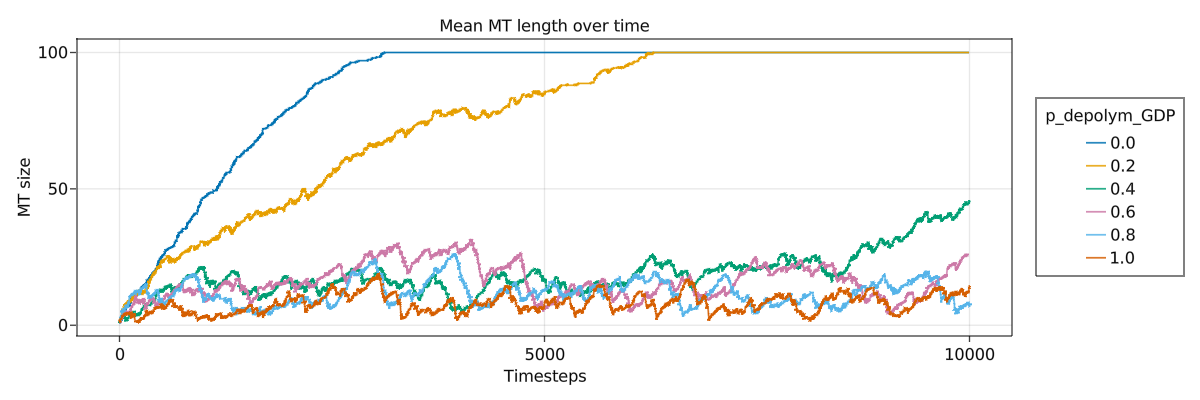

In [58]:
f2_1 = Figure(resolution =(1200, 400))
ax2_1 = Axis(f2_1[1,1]; xlabel = "Timesteps", ylabel = "MT size", title = "Mean MT length over time")

for i in 1:6
    range = ((i-1)*10000 + i):i*10001
    lines!(ax2_1, data2_1.step[range], data2_1.mean_MT_size[range], label = string(data2_1.p_depolym_GDP[i*10001]))
end

Legend(f2_1[1,2], ax2_1, "p_depolym_GDP")
f2_1

### 2.3 Repeat with 10 different probabilities

In [48]:
# Scanning  parameters
parameters=Dict(
            :griddims => (100,100),
            :periodic => true,
            :Nstarts => 5,
            :numagents => 1000, 
            :p_hyd => 0.02,                   
            :p_polym=> 1 ,    
            :p_depolym_GTP => 0,
            :p_depolym_GDP => collect([0:0.1:1]...), #11 verschiedene Wahrscheinlichkeiten
            :p_GTP_exchange => 0.01)

mdata = [mean_MT_size]

# Run Model 
_ , paramdata = paramscan(parameters, initialize;  mdata, agent_step!, model_step!, n=10000); # we don't need adata in this case thus _ , paramdata
serialize("data/paramscan_p_depolym_GDP_3.jls", paramdata)

Progress: 100%|█████████████████████████████████████████| Time: 0:01:26


In [59]:
data2_2 = deserialize("data/paramscan_p_depolym_GDP_3.jls") #110011 rows
f2_2 = Figure(resolution =(1200, 400))

ax2_2 = Axis(f2_2[1,1]; xlabel = "Timesteps", ylabel = "MT size", title = "Mean MT length over time")

for i in 1:11
    range = ((i-1)*10000 + i):i*10001
    lines!(ax2_2, data2_2.step[range], data2_2.mean_MT_size[range], label = string(data2_2.p_depolym_GDP[i*10001]), color = co.tab20[i])
end

Legend(f2_2[1,2], ax2_2, "p_depolym_GDP")

f2_2

LoadError: SystemError: opening file "data/paramscan_p_depolym_GDP_3.jls": No such file or directory

### 2.3 Repeat with 10 different probabilities and longer timesteps

In [61]:
# Scanning  parameters
parameters=Dict(
            :griddims => (100,100),
            :periodic => true,
            :Nstarts => 5,
            :numagents => 1000, 
            :p_hyd => 0.02,                   
            :p_polym=> 1.0 ,    
            :p_depolym_GTP => 0.0,
            :p_depolym_GDP => collect([0:0.1:1]...), #11 verschiedene Wahrscheinlichkeiten
            :p_GTP_exchange => 0.01)

mdata = [mean_MT_size]

# Run Model 
_ , paramdata = paramscan(parameters, initialize;  mdata, agent_step!, model_step!, n=100000)
serialize("data/paramscan_p_depolym_GDP_long.jls", paramdata)

Progress: 100%|█████████████████████████████████████████| Time: 0:33:35


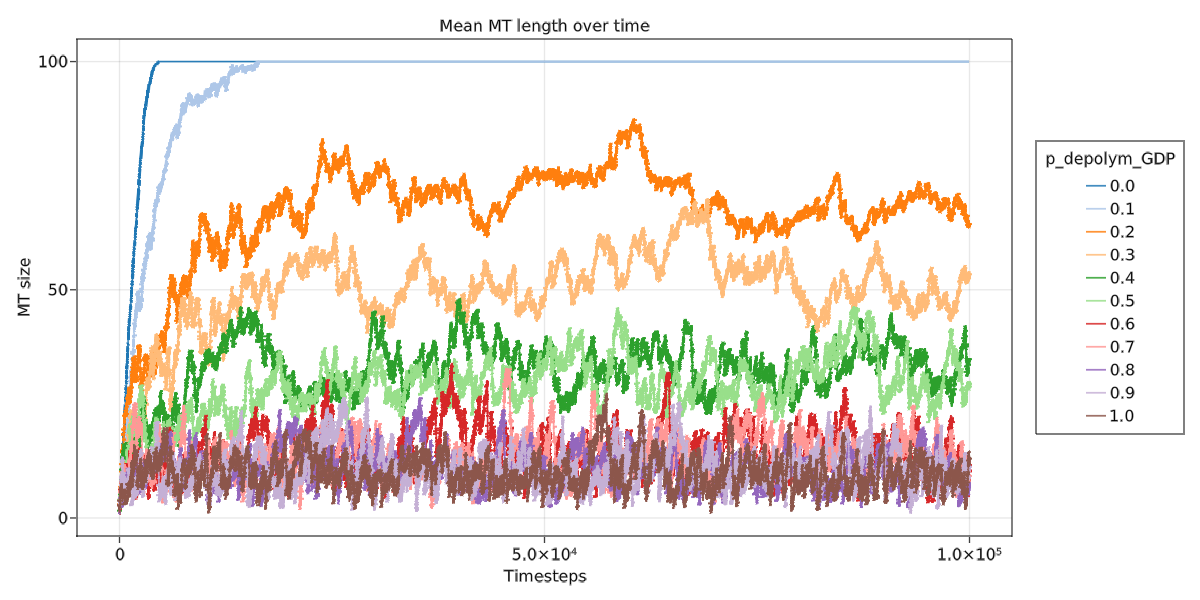

In [119]:
data2_3 = deserialize("data/paramscan_p_depolym_GDP_long.jls"); #1.100.011 rows
f2_3 = Figure(resolution =(1200, 600))
ax2_3 = Axis(f2_3[1,1]; xlabel = "Timesteps", ylabel = "MT size", title = "Mean MT length over time")

for i in 1:11
    range = ((i-1)*100000 + i):i*100001
    lines!(ax2_3, data2_3.step[range], data2_3.mean_MT_size[range], label = string(data2_3.p_depolym_GDP[i*100001]), color = co.tab20[i])
end

Legend(f2_3[1,2], ax2_3, "p_depolym_GDP", orientation = :horizontal, tellwidth = false, tellheight = true)

f2_3

In [167]:
# Scanning  parameters
parameters=Dict(
            :griddims => (100,100),
            :periodic => true,
            :Nstarts => 10,
            :numagents => 1000, 
            :p_hyd => 0.02,                   
            :p_polym=> 1 ,    
            :p_depolym_GTP => 0,
            :p_depolym_GDP => collect([0:0.1:1]...), #11 verschiedene Wahrscheinlichkeiten
            :p_GTP_exchange => 0.01)
# Model Data:
mdata = [mean_MT_size]

# Run Model 
_ , paramdata = paramscan(parameters, initialize;  mdata, agent_step!, model_step!, n=100000)
serialize("data/paramscan_p_depolym_GDP_long_10starts.jls", paramdata)

Progress: 100%|█████████████████████████████████████████| Time: 0:22:09


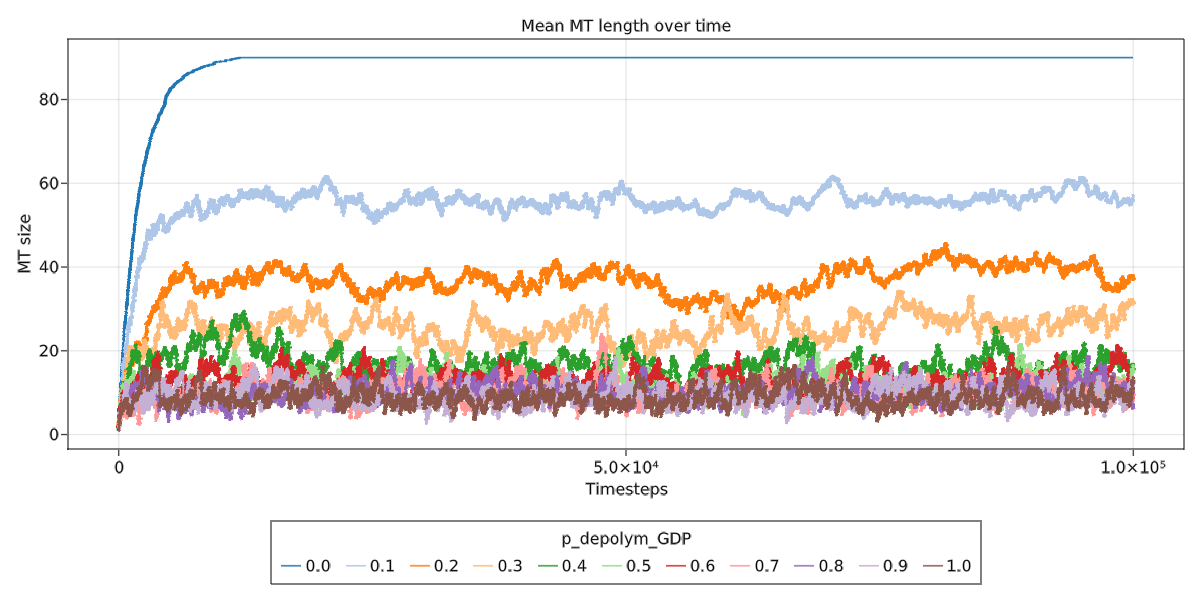

In [172]:
data2_3_1 = deserialize("data/paramscan_p_depolym_GDP_long_10starts.jls")
f2_3_1 = Figure(resolution =(1200, 600))
ax2_3_1 = Axis(f2_3_1[1,1]; xlabel = "Timesteps", ylabel = "MT size", title = "Mean MT length over time")

for i in 1:11
    range = ((i-1)*100000 + i):i*100001
    lines!(ax2_3_1, data2_3_1.step[range], data2_3_1.mean_MT_size[range], label = string(data2_3.p_depolym_GDP[i*100001]), color = co.tab20[i])
end

Legend(f2_3_1[2,1], ax2_3, "p_depolym_GDP", orientation = :horizontal, tellwidth = false, tellheight = true)

f2_3_1

In [2]:
models = [initialize(;
        Nstarts = 2,
        periodic = true,
        numagents = 1000,
        griddims = (100,100), 
        p_polym = 1,
        p_hyd = 0.02,
        p_GTP_exchange = 0.01,
        p_depolym_GTP = 0,
        p_depolym_GDP = x)  
    for x in repeat(collect([0:0.2:1]...), 10)]

# Run ensemble of models for 100000 timesteps and collect data:
mdata = [mean_MT_size, (:p_depolym_GDP)]
mlabels = ["mean MT length", "p_depolym_GDP"]

data_ens = ensemblerun!(models, agent_step!, model_step!, 100000; mdata)
serialize("data/paramscan_p_depolym_GDP_10ensemble_long_2starts.jls", data_ens[2])

In [11]:
data = deserialize("data/paramscan_p_depolym_GDP_10ensemble_long_2starts.jls")
gdf = groupby(data, [:p_depolym_GDP, :step])
summary_df = combine(gdf, [:mean_MT_size] .=> [mean]);

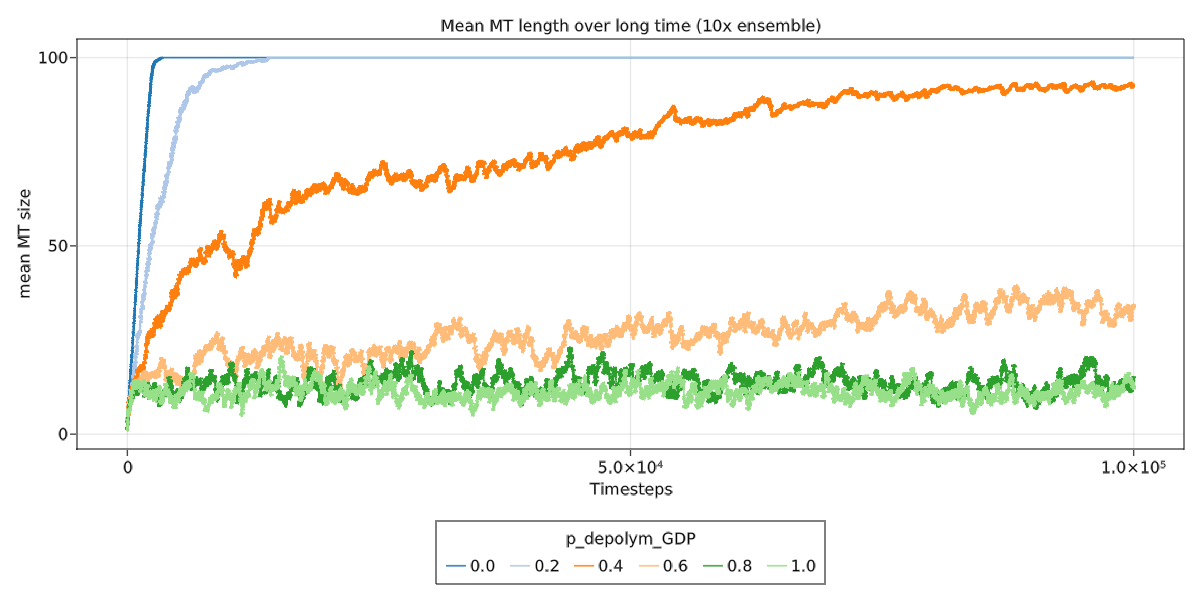

In [19]:
f2_5 = Figure(resolution =(1200, 600))
range = collect(0:0.2:1)
ax2_5 = Axis(f2_5[1,1]; xlabel = "Timesteps", ylabel = "mean MT size", title = "Mean MT length over long time (10x ensemble)")

for (i,v) in enumerate(range)
    df_sub = @subset(summary_df, :p_depolym_GDP .== v) 
    lines!(ax2_5, df_sub.step, df_sub.mean_MT_size_mean; label = "$v", color = co.tab20[i])

end

Legend(f2_5[2,1], ax2_5, "p_depolym_GDP", orientation = :horizontal, tellwidth = false, tellheight = true)

f2_5

### 2.4 repeat 2.2 but with 10 ensembles

In [20]:
models = [initialize(;
        Nstarts = 5,
        periodic = true,
        numagents = 1000,
        griddims = (100,100), 
        p_polym = 1,
        p_hyd = 0.02,
        p_GTP_exchange = 0.01,
        p_depolym_GTP = 0,
        p_depolym_GDP = x)  
    for x in repeat(collect([0:0.1:1]...), 10)]

# Run ensemble of models for 3600 timesteps and collect data:
mdata = [mean_MT_size, (:p_depolym_GDP)]

data_ens = ensemblerun!(models, agent_step!, model_step!, 10000; mdata)
serialize("data/paramscan_p_depolym_GDP_10ensemble.jls", data_ens[2])

In [8]:
data = deserialize("data/paramscan_p_depolym_GDP_10ensemble.jls")
gdf = groupby(data, [:p_depolym_GDP, :step])
summary_df = combine(gdf, [:mean_MT_size] .=> [mean]);

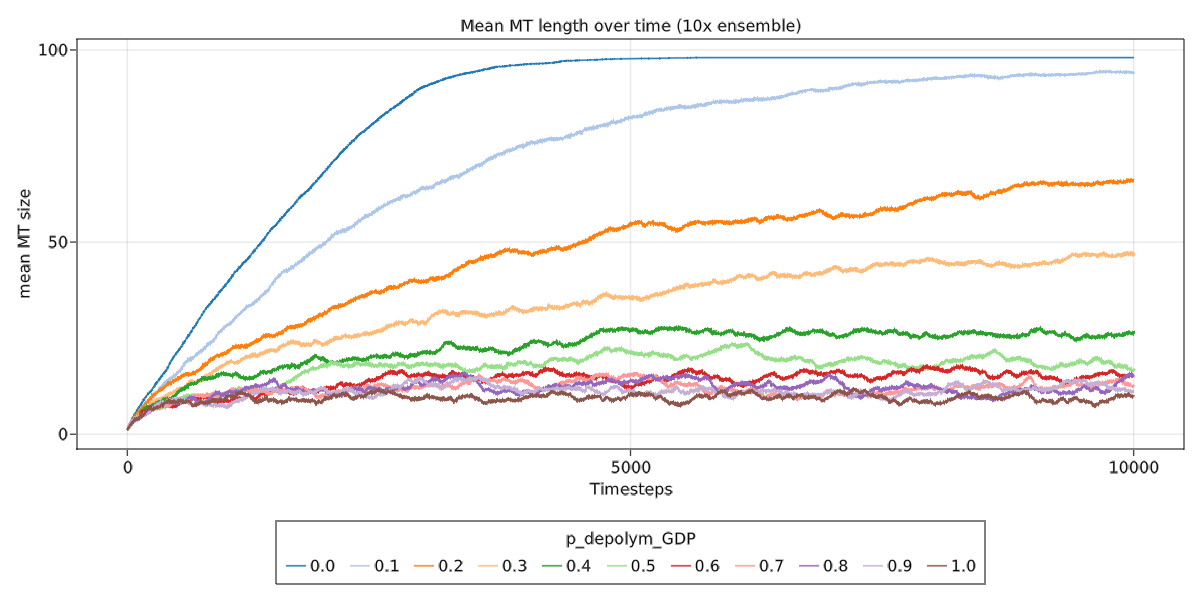

In [4]:
f2_4 = Figure(resolution =(1200, 600))

ax2_4 = Axis(f2_4[1,1]; xlabel = "Timesteps", ylabel = "mean MT size", title = "Mean MT length over time (10x ensemble)")

for i in 1:11
    range = ((i-1)*10000 + i ):i*10001
    lines!(ax2_4, summary_df.step[range], summary_df.mean_MT_size_mean[range], label = string(summary_df.p_depolym_GDP[i*10001]), color = co.tab20[i])
end
Legend(f2_4[2,1], ax2_4, "p_depolym_GDP", orientation = :horizontal, tellwidth = false, tellheight = true)

f2_4

### 2.5 Repeat ensemble but with 100 000 steps (parallelization)
runtime: 1h12min

In [2]:
@everywhere begin
    models = [initialize(;
            Nstarts = 2,
            periodic = true,
            numagents = 1000,
            griddims = (100,100), 
            p_polym = 1.0,
            p_hyd = 0.02,
            p_GTP_exchange = 0.01,
            p_depolym_GTP = 0.0,
            p_depolym_GDP = x)  
        for x in repeat(collect([0.0:0.1:1.0]...), 10)]

    mdata = [mean_MT_size, (:p_depolym_GDP)]
    mlabels = ["mean MT length", "p_depolym_GDP"]
end
data_ens = ensemblerun!(models, agent_step!, model_step!, 100000; mdata, parallel = true)
serialize("data/paramscan_p_depolym_GDP_10ensemble_100k_Steps.jls", data_ens[2])

In [31]:
data = deserialize("data/paramscan_p_depolym_GDP_10ensemble_100k_Steps.jls")
gdf = groupby(@subset(data, :ensemble .!= 1, :ensemble .!= 34, :ensemble .!= 67, :ensemble .!= 68), [:p_depolym_GDP, :step])
summary_df = combine(gdf, [:mean_MT_size] .=> [mean]);

In [32]:
#MT Length over time
f2_4_2 = Figure(resolution =(1200, 600))

ax2_4_2 = Axis(f2_4_2[1,1]; xlabel = "Timesteps", ylabel = "mean MT size", title = "Mean MT length over time (10x ensemble) - exluded ensembles 1, 34, 67, 68")
range = collect(0.0:0.1:1.0)
for (i,v) in enumerate(range)
    sub_data = @subset(summary_df, :p_depolym_GDP .== v)
    lines!(ax2_4_2, sub_data.step[1:10:100000], sub_data.mean_MT_size_mean[1:10:100000], label = "$v", color = co.tab20[i], linewidth = 3)
end
Legend(f2_4_2[2,1], ax2_4_2, "p_depolym_GDP", orientation = :horizontal, tellwidth = false, tellheight = true)

f2_4_2

In [6]:
@subset(data, :p_depolym_GDP .== 0.0, :step .== 50000); #exclude: ensemble 1, 34, 67

In [7]:
@subset(data, :p_depolym_GDP .== 0.1, :step .== 50000); #exclude ensemble 68

In [3]:
#Mean Length
f2_6 = Figure(resolution = (800, 600)) 
range = collect(0.0:0.1:1.0)

ax2_6 = Axis(f2_6[1,1]; titel = "Avg of MT lengths", xlabel = "p_depolym_GDP", ylabel ="Mean MT length", xticks = LinearTicks(11), yticklabelcolor = :green,  ylabelcolor = :green)

means = Float64[]
stds = Float64[]
for (i,v) in enumerate(range)
    df_sub = @subset(summary_df, :step .>= 50000, :p_depolym_GDP .== v)  
    append!(means, mean(df_sub.mean_MT_size_mean))
    append!(stds, std(df_sub.mean_MT_size_mean))
end

l1 = lines!(ax2_6, range, means, color = :green)
l2 = errorbars!(ax2_6, range, means, stds, color = :red, whiskerwidth = 10)

Legend(f2_6[2,1], [l1, l2], ["Mean", "Std"], orientation = :horizontal, tellwidth = false, tellheight = true)

f2_6

In [ ]:
#Skewness
f2_7 = Figure(resolution = (1000,400)) 
range = collect(0.0:0.1:1.0)
ax2_7 = Axis(f2_7[1,1]; ylabel = "Skewness", xlabel = "p_depolym_GDP", xticks = LinearTicks(20))

skews = Float64[]
for (i,v) in enumerate(range)
    df_sub = @subset(summary_df, :step .>= 50000, :p_depolym_GDP .== v) 
    append!(skews, skewness(df_sub.mean_MT_size_mean))
end
hlines!(ax2_7, 0, color = :red)
lines!(ax2_7, range, skews)

f2_7

In [4]:
#Histogramm
f2_8 = Figure(resolution = (1000, 400)) 
range = collect(0.0:0.1:1.0)
ax2_8 = Axis(f2_8[1,1]; xlabel = "MT Length", title = "Mean MT Length Distributions for each p_depolym_GDP (beginning at step 50000)")
hideydecorations!(ax2_8)
xlims!(ax2_8, 0, 100)

for (i,v) in enumerate(range)
    df_sub = @subset(summary_df, :step .>= 50000, :p_depolym_GDP .== v) 
    hist!(ax2_8, df_sub.mean_MT_size_mean; bins = 100, scale_to=0.003, direction=:y, label = "$v", color = co.tab20[i])
end

Legend(f2_8[2,1], ax2_8, "p_depolym_GDP", merge = true, orientation = :horizontal, tellwidth = false, tellheight = true)

f2_8

#### 2.5.1 Repeat for p = 0.0 and 0.1 because max. MT length is not correct


In [2]:
@everywhere begin
    models = [initialize(;
            Nstarts = 2,
            periodic = true,
            numagents = 1000,
            griddims = (100,100), 
            p_polym = 1.0,
            p_hyd = 0.02,
            p_GTP_exchange = 0.01,
            p_depolym_GTP = 0.0,
            p_depolym_GDP = x)  
        for x in repeat(collect([0.0:0.1:0.1]...), 10)]

    mdata = [mean_MT_size, (:p_depolym_GDP)]
    mlabels = ["mean MT length", "p_depolym_GDP"]
end
data_ens = ensemblerun!(models, agent_step!, model_step!, 100000; mdata, parallel = true);

In [3]:
serialize("data/paramscan_p_depolym_GDP_only0and01_10ensemble_100k_Steps.jls", data_ens[2])

In [7]:
data = deserialize("data/paramscan_p_depolym_GDP_only0and01_10ensemble_100k_Steps.jls")
gdf = groupby(data, [:p_depolym_GDP, :step])
sum_0_01 = combine(gdf, [:mean_MT_size] .=> [mean]);

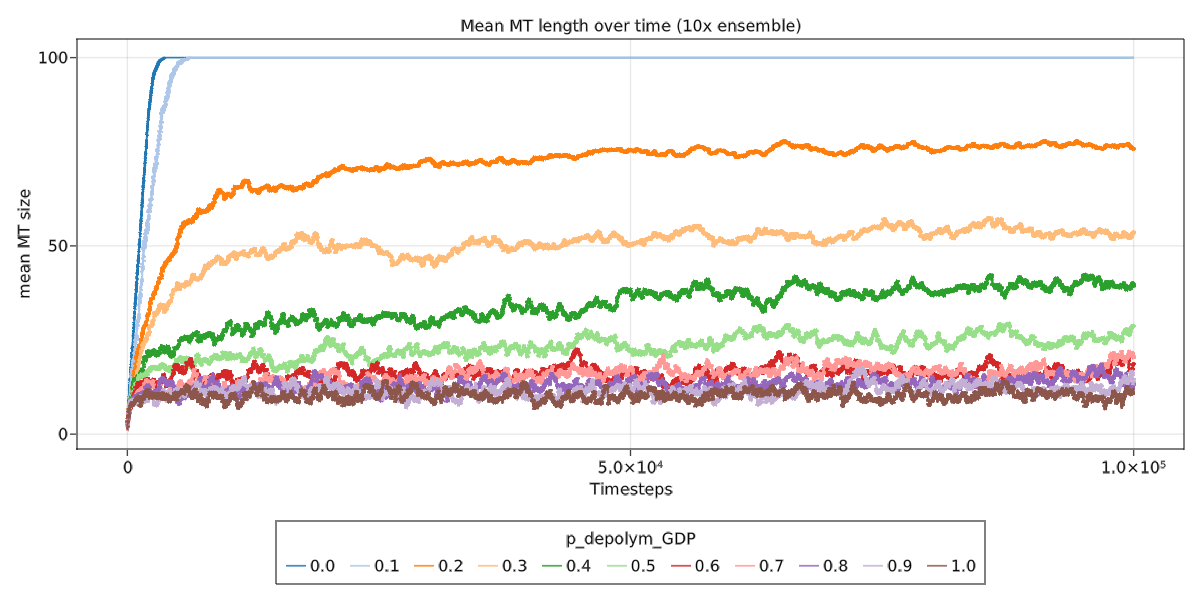

In [9]:
f2_4_3 = Figure(resolution =(1200, 600))

ax2_4_3 = Axis(f2_4_3[1,1]; xlabel = "Timesteps", ylabel = "mean MT size", title = "Mean MT length over time (10x ensemble)")
range = collect(0.0:0.1:1.0)
for (i,v) in enumerate(range)
    if i < 3
        sub_data = @subset(sum_0_01, :p_depolym_GDP .== v)
        lines!(ax2_4_3, sub_data.step, sub_data.mean_MT_size_mean, label = "$v", color = co.tab20[i])
    else
        sub_data = @subset(summary_df, :p_depolym_GDP .== v)
        lines!(ax2_4_3, sub_data.step, sub_data.mean_MT_size_mean, label = "$v", color = co.tab20[i])
    end
end


Legend(f2_4_3[2,1], ax2_4_3, "p_depolym_GDP", orientation = :horizontal, tellwidth = false, tellheight = true)

f2_4_3

Analysis of 2.5

In [18]:
data = deserialize("data/paramscan_p_depolym_GDP_10ensemble_100k_Steps.jls")
gdf = groupby(@subset(data, :ensemble .!= 1, :ensemble .!= 34, :ensemble .!= 67, :ensemble .!= 68), [:p_depolym_GDP, :step])
sum5_1 = combine(gdf, [:mean_MT_size] .=> [mean]);

In [21]:
f2_5 = Figure(resolution = (800, 600)) 
range = collect(0.1:0.1:1.0)
#ax2_5_1 = Axis(f2_5[1,1]; titel = "Variance of MT length distribution", xlabel = "p_depolym_GDP", xticks = LinearTicks(5), yticklabelcolor = :blue, ylabelcolor = :blue)
ax2_5_2 = Axis(f2_5[1,1]; titel = "Avg of MT lengths", xlabel = "p_depolym_GDP", ylabel ="Mean MT length", xticks = LinearTicks(10), yticklabelcolor = :green,  ylabelcolor = :green)
#ax2_5_3 = Axis(f2_5[1,3]; titel = "Std of MT length distribution", xlabel = "p_depolym_GDP", xticks = LinearTicks(5), yticklabelcolor = :red, ylabelcolor = :red)

#vars = Float64[]
means = Float64[]
stds = Float64[]
for (i,v) in enumerate(range)
    df_sub = @subset(sum5_1, :step .>= 50000, :p_depolym_GDP .== v)  
    #append!(vars, var(df_sub.mean_MT_size_mean))
    append!(means, mean(df_sub.mean_MT_size_mean))
    append!(stds, std(df_sub.mean_MT_size_mean))
end

#l1 = lines!(ax2_5_1, range, vars, color = :blue)
l2 = lines!(ax2_5_2, range, means, color = :green)
l3 = errorbars!(ax2_5_2, range, means, stds, color = :red, whiskerwidth = 10)

Legend(f2_5[2,1], [l2, l3], ["Mean", "Std"], orientation = :horizontal, tellwidth = false, tellheight = true)

f2_5

### 2.5.2 Repeat 2.5 but with 4 Nstarts and p_hyd 0.024
runtime = 92 min

In [12]:
@everywhere begin
    models = [initialize(;
            Nstarts = 4,
            periodic = true,
            numagents = 1000,
            griddims = (100,100), 
            p_polym = 1.0,
            p_hyd = 0.024,
            p_GTP_exchange = 0.01,
            p_depolym_GTP = 0.0,
            p_depolym_GDP = x)  
        for x in repeat(collect([0.0:0.1:1.0]...), 10)]

    mdata = [mean_MT_size, (:p_depolym_GDP)]
    mlabels = ["mean MT length", "p_depolym_GDP"]
end
data_ens = ensemblerun!(models, agent_step!, model_step!, 100000; mdata, parallel = true)
serialize("data/paramscan_p_depolym_GDP_10ensemble_100k_Steps_4Nstarts_0_024_phyd.jls", data_ens[2])

In [41]:
data2 = deserialize("data/paramscan_p_depolym_GDP_10ensemble_100k_Steps_4Nstarts_0_024_phyd.jls")
gdf = groupby(@subset(data2, :ensemble .!= 12, :ensemble .!= 68), [:p_depolym_GDP, :step])
sum2_5_2 = combine(gdf, [:mean_MT_size] .=> [mean]);

In [44]:
@subset(data2, :p_depolym_GDP .== 0.0, :step .== 50000); # exclude ensemble 12

In [46]:
@subset(data2, :p_depolym_GDP .== 0.1, :step .== 50000); #exclude ensemble 68

In [42]:
#MT Length over time
f2_5 = Figure(resolution =(1200, 600))

ax2_5 = Axis(f2_5[1,1]; xlabel = "Timesteps", ylabel = "mean MT size", title = "Mean MT length over time (10x ensemble) - exluded ensembles 12, 68")
range = collect(0.0:0.1:1.0)
for (i,v) in enumerate(range)
    sub_data = @subset(sum2_5_2, :p_depolym_GDP .== v)
    lines!(ax2_5, sub_data.step, sub_data.mean_MT_size_mean, label = "$v", color = co.tab20[i])
end
Legend(f2_5[2,1], ax2_5, "p_depolym_GDP", orientation = :horizontal, tellwidth = false, tellheight = true)

f2_5

In [47]:
#Mean Length
f2_6 = Figure(resolution = (800, 600)) 
range = collect(0.0:0.1:1.0)

ax2_6 = Axis(f2_6[1,1]; titel = "Avg of MT lengths", xlabel = "p_depolym_GDP", ylabel ="Mean MT length", xticks = LinearTicks(11), yticklabelcolor = :green,  ylabelcolor = :green)

means = Float64[]
stds = Float64[]
for (i,v) in enumerate(range)
    df_sub = @subset(sum2_5_2, :step .>= 50000, :p_depolym_GDP .== v)  
    append!(means, mean(df_sub.mean_MT_size_mean))
    append!(stds, std(df_sub.mean_MT_size_mean))
end

l1 = lines!(ax2_6, range, means, color = :green)
l2 = errorbars!(ax2_6, range, means, stds, color = :red, whiskerwidth = 10)

Legend(f2_6[2,1], [l1, l2], ["Mean", "Std"], orientation = :horizontal, tellwidth = false, tellheight = true)

f2_6

In [ ]:
#Histogramm
f2_8 = Figure(resolution = (1000, 400)) 
range = collect(0.0:0.1:1.0)
ax2_8 = Axis(f2_8[1,1]; xlabel = "MT Length", title = "Mean MT Length Distributions for each p_depolym_GDP (beginning at step 50000)")
hideydecorations!(ax2_8)
xlims!(ax2_8, 0, 100)

for (i,v) in enumerate(range)
    df_sub = @subset(summary_df, :step .>= 50000, :p_depolym_GDP .== v) 
    hist!(ax2_8, df_sub.mean_MT_size_mean; bins = 100, scale_to=0.003, direction=:y, label = "$v", color = co.tab20[i])
end

Legend(f2_8[2,1], ax2_8, "p_depolym_GDP", merge = true, orientation = :horizontal, tellwidth = false, tellheight = true)

f2_8

### 2.5.3 50x Ensemble, 50 000 steps with one Nstart position to compare performance
took too long.. had to abort

In [ ]:
@everywhere begin
    models = [initialize(;
            Nstarts = 1,
            periodic = true,
            numagents = 1000,
            griddims = (100,100), 
            p_polym = 1.0,
            p_hyd = 0.02,
            p_GTP_exchange = 0.01,
            p_depolym_GTP = 0.0,
            p_depolym_GDP = x)  
        for x in repeat(collect([0.0:0.1:1.0]...), 50)]

    mdata = [mean_MT_size, (:p_depolym_GDP)]
    mlabels = ["mean MT length", "p_depolym_GDP"]
end
data_ens = ensemblerun!(models, agent_step!, model_step!, 50000; mdata, parallel = true);

## 3. Finding Metrics
### 3.1 Histogram for MT length distribution

In [22]:
#dataframe beginning at 500 steps
df_1 = @subset(summary_df, :step .>= 500, :p_depolym_GDP .== 1);

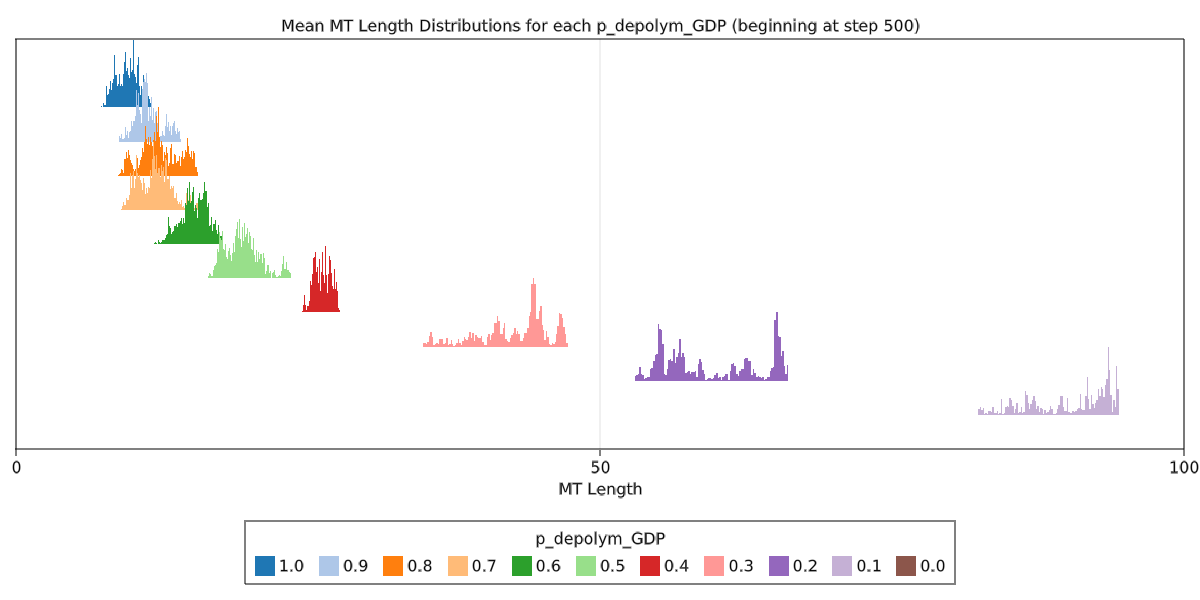

In [9]:
f2_6 = Figure(resolution = (1200, 600)) 
range = collect(1:-0.1:0)
ax2_6 = Axis(f2_6[1,1]; xlabel = "MT Length", title = "Mean MT Length Distributions for each p_depolym_GDP (beginning at step 500)")
hideydecorations!(ax2_6)
xlims!(ax2_6, 0, 100)
ylims!(ax2_6, 0, 1.2)

for (i,v) in enumerate(range)
    df_sub = @subset(summary_df, :step .>= 5000, :p_depolym_GDP .== v) 
    hist!(ax2_6, df_sub.mean_MT_size_mean; bins = 100, scale_to=0.2, offset=v, direction=:y, label = "$v", color = co.tab20[i])
    #vlines!(ax2_6, mean(df_sub.mean_MT_size_mean); ymin = v/1.2, ymax = (v+0.1)/1.2,color = :black, linestyle = :dash, label = "mean")
end



Legend(f2_6[2,1], ax2_6, "p_depolym_GDP", merge = true, orientation = :horizontal, tellwidth = false, tellheight = true)

f2_6

#### 3.1.1 Skewness, Variance, Mean, Std

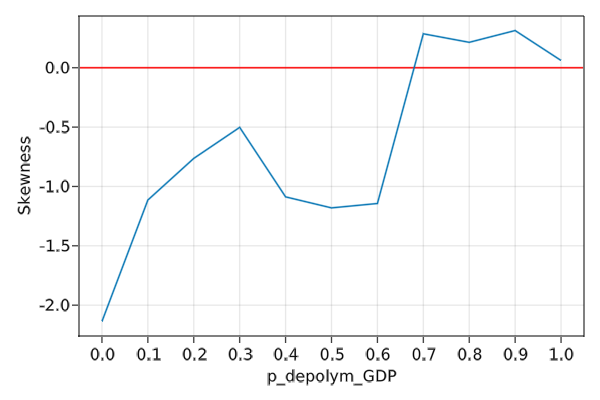

In [12]:
f2_7 = Figure(resolution = (600,400)) 
range = collect(0:0.1:1)
ax2_7 = Axis(f2_7[1,1]; ylabel = "Skewness", xlabel = "p_depolym_GDP", xticks = LinearTicks(11))

xlims!(ax2_6, 0.0, 1.0)

skews = Float64[]
for (i,v) in enumerate(range)
    df_sub = @subset(summary_df, :step .>= 1000, :p_depolym_GDP .== v) 
    append!(skews, skewness(df_sub.mean_MT_size_mean))
end
hlines!(ax2_7, 0, color = :red)
lines!(ax2_7, range, skews)

f2_7  


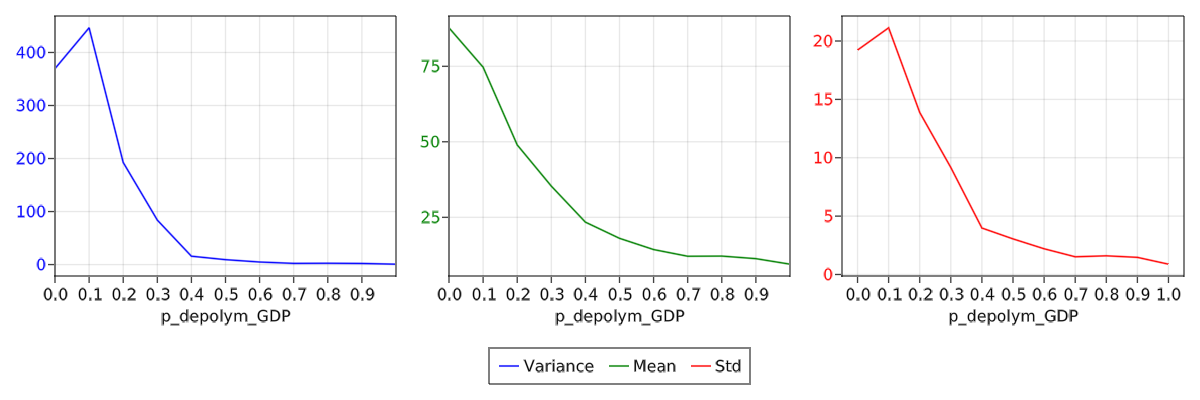

In [145]:
f2_10 = Figure(resolution = (1200, 400)) 
range = collect(0:0.1:1)
ax2_10 = Axis(f2_10[1,1]; titel = "Variance of MT length distribution", xlabel = "p_depolym_GDP", xticks = LinearTicks(11), yticklabelcolor = :blue, ylabelcolor = :blue)
ax2_11 = Axis(f2_10[1,2]; titel = "Mean of MT length distribution", xlabel = "p_depolym_GDP", xticks = LinearTicks(11), yticklabelcolor = :green,  ylabelcolor = :green)
ax2_12 = Axis(f2_10[1,3]; titel = "Std of MT length distribution", xlabel = "p_depolym_GDP", xticks = LinearTicks(11), yticklabelcolor = :red, ylabelcolor = :red)

xlims!(ax2_10, 0.0, 1.0)
xlims!(ax2_11, 0.0, 1.0)

vars = Float64[]
for (i,v) in enumerate(range)
    df_sub = @subset(summary_df, :step .>= 500, :p_depolym_GDP .== v) 
    append!(vars, var(df_sub.mean_MT_size_mean))
end
means = Float64[]
for (i,v) in enumerate(range)
    df_sub = @subset(summary_df, :step .>= 500, :p_depolym_GDP .== v) 
    append!(means, mean(df_sub.mean_MT_size_mean))
end
stds = Float64[]
for (i,v) in enumerate(range)
    df_sub = @subset(summary_df, :step .>= 500, :p_depolym_GDP .== v) 
    append!(stds, std(df_sub.mean_MT_size_mean))
end

l1 = lines!(ax2_10, range, vars, color = :blue)
l2 = lines!(ax2_11, range, means, color = :green)
l3 = lines!(ax2_12, range, stds, color = :red)

Legend(f2_10[2,2], [l1, l2, l3], ["Variance", "Mean", "Std"], orientation = :horizontal, tellwidth = false, tellheight = true)

f2_10 


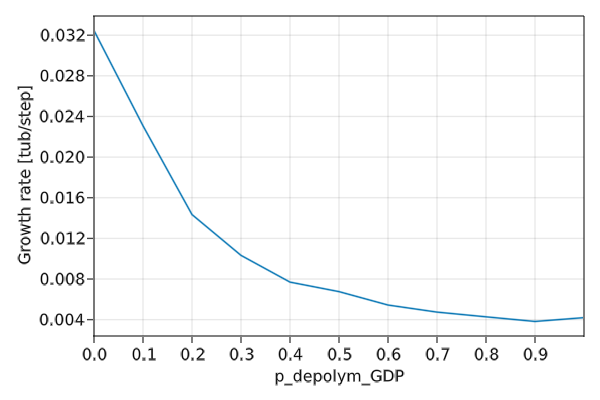

In [25]:
f3 = Figure(resolution = (600,400)) 
range = collect(0:0.1:1)
ax3 = Axis(f3[1,1]; ylabel = "Growth rate [tub/step]", xlabel = "p_depolym_GDP", xticks = LinearTicks(11), yticks = LinearTicks(10))

xlims!(ax3, 0.0, 1.0)

rates = Float64[]
for (i,v) in enumerate(range)
    df_sub = @subset(summary_df, :p_depolym_GDP .== v) 
    append!(rates, (df_sub.mean_MT_size_mean[2501] - df_sub.mean_MT_size_mean[1])/2500)
end
#hlines!(ax3, 0, color = :red)
lines!(ax3, range, rates)

f3  


### 3.2 Histogram for MT length distribution over long periods of time

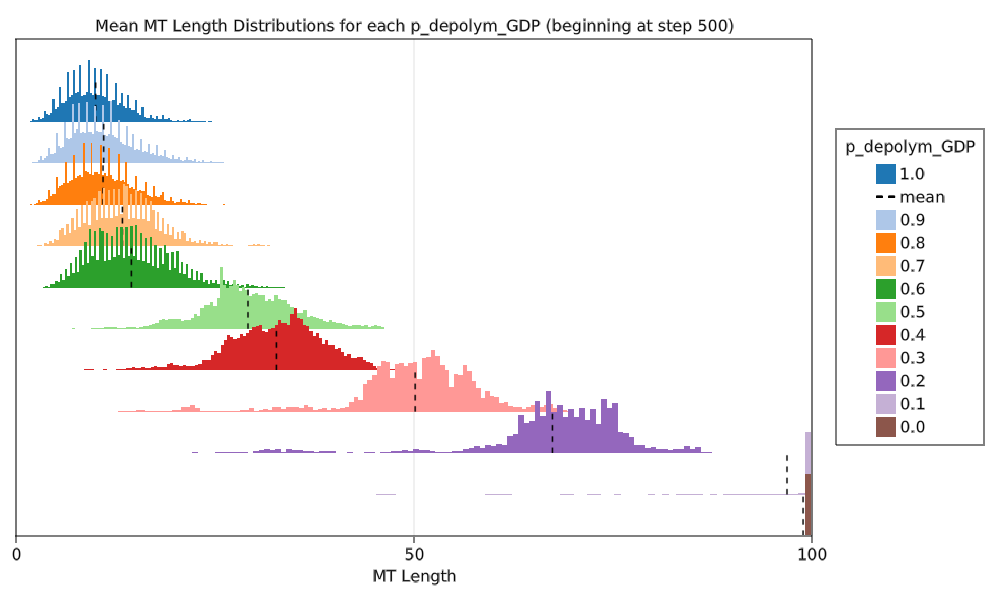

In [153]:
f2_8 = Figure(resolution = (1000, 600)) 
range = collect(1:-0.1:0)
ax2_8 = Axis(f2_8[1,1]; xlabel = "MT Length", title = "Mean MT Length Distributions for each p_depolym_GDP (beginning at step 500)")
hideydecorations!(ax2_8)
xlims!(ax2_8, 0, 100)
ylims!(ax2_8, 0, 1.2)

for (i,v) in enumerate(range)
    df_sub = @subset(data2_3, :step .>= 500, :p_depolym_GDP .== v) 
    hist!(ax2_8, df_sub.mean_MT_size; bins = 100, scale_to=0.15, offset=v, direction=:y, label = "$v", color = co.tab20[i])
    vlines!(ax2_8, mean(df_sub.mean_MT_size); ymin = v/1.2, ymax = (v+0.1)/1.2,color = :black, linestyle = :dash, label = "mean")
end

Legend(f2_8[1,2], ax2_8, "p_depolym_GDP", merge = true)

f2_8

#### 3.2.1 Skewness, Variance, Mean, Std

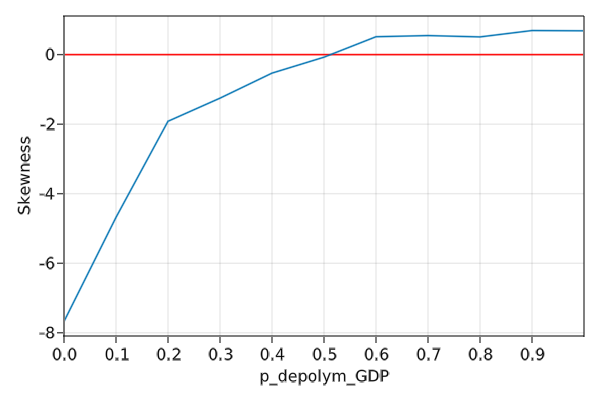

In [148]:
f2_9 = Figure(resolution = (600,400)) 
range = collect(0:0.1:1)
ax2_9 = Axis(f2_9[1,1]; ylabel = "Skewness", xlabel = "p_depolym_GDP", xticks = LinearTicks(11))

xlims!(ax2_9, 0.0, 1.0)

skews = Float64[]
for (i,v) in enumerate(range)
    df_sub = @subset(data2_3, :step .>= 500, :p_depolym_GDP .== v) 
    append!(skews, skewness(df_sub.mean_MT_size))
end
hlines!(ax2_9, 0, color = :red)
lines!(ax2_9, range, skews)

f2_9 

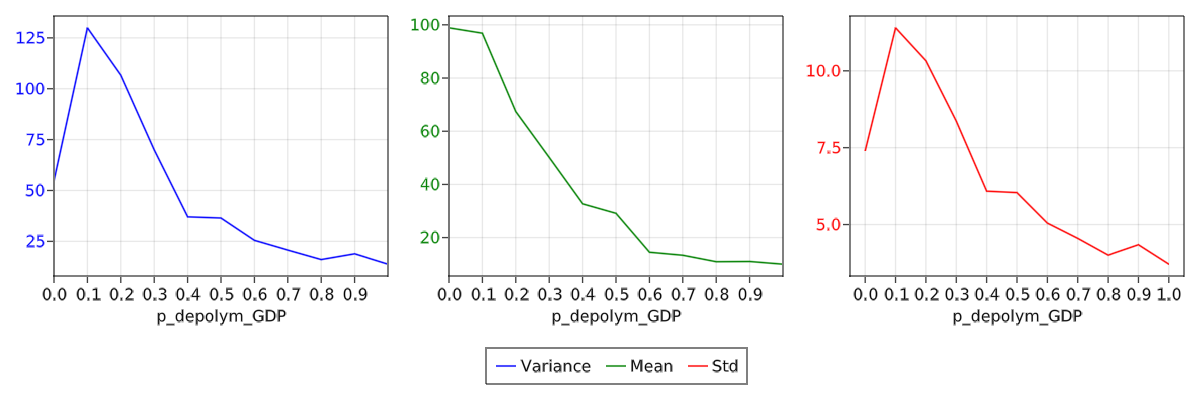

In [147]:
f2_11 = Figure(resolution = (1200, 400)) 
range = collect(0:0.1:1)
ax2_10 = Axis(f2_11[1,1]; titel = "Variance of MT length distribution", xlabel = "p_depolym_GDP", xticks = LinearTicks(11), yticklabelcolor = :blue, ylabelcolor = :blue)
ax2_11 = Axis(f2_11[1,2]; titel = "Mean of MT length distribution", xlabel = "p_depolym_GDP", xticks = LinearTicks(11), yticklabelcolor = :green,  ylabelcolor = :green)
ax2_12 = Axis(f2_11[1,3]; titel = "Std of MT length distribution", xlabel = "p_depolym_GDP", xticks = LinearTicks(11), yticklabelcolor = :red, ylabelcolor = :red)

xlims!(ax2_10, 0.0, 1.0)
xlims!(ax2_11, 0.0, 1.0)

vars = Float64[]
for (i,v) in enumerate(range)
    df_sub = @subset(data2_3, :step .>= 500, :p_depolym_GDP .== v) 
    append!(vars, var(df_sub.mean_MT_size))
end
means = Float64[]
for (i,v) in enumerate(range)
    df_sub = @subset(data2_3, :step .>= 500, :p_depolym_GDP .== v) 
    append!(means, mean(df_sub.mean_MT_size))
end
stds = Float64[]
for (i,v) in enumerate(range)
    df_sub = @subset(data2_3, :step .>= 500, :p_depolym_GDP .== v) 
    append!(stds, std(df_sub.mean_MT_size))
end

l1 = lines!(ax2_10, range, vars, color = :blue)
l2 = lines!(ax2_11, range, means, color = :green)
l3 = lines!(ax2_12, range, stds, color = :red)

Legend(f2_11[2,2], [l1, l2, l3], ["Variance", "Mean", "Std"], orientation = :horizontal, tellwidth = false, tellheight = true)

f2_11 
